In [2]:
import json

import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

### Load dataset and results from first experiments
The dataset contains the index in the original imdb dataset, the text, the tokenized texts, the
input ids and the label. It consists of 1000 observations.
The results contain the index in the original imdb dataset, the attribution values of the
attribution method on that observation and the TPN/TPS of these attributions.
As Model Distilbert is used. Before saving, it was optimized and quantized for faster inference.
For a performance comparison see notebooks/run_distilbert_full_vs_quantized.ipynb.

In [83]:
ex_ids = [1, 1,1]
all_results = []
for ex_id in ex_ids:
    path = f"./../logs/{ex_id}/"
    with open(path + "metrics.json") as fp:
        results = json.load(fp)
    with open(path + "config.json") as fp:
        config = json.load(fp)
    result_dict = {
        "name": config["attribution_method"]["name"],
        "tpn": results["tpn"]["values"],
                "tps": results["tps"]["values"]

    }
    all_results.append(result_dict)
all_results

[{'name': 'random-attribution-value1s',
  'tpn': [0.1351929608829011, 0.14877296885220032],
  'tps': [0.5030709809447801, 0.5135571730970353]},
 {'name': 'random-attribution-value1s',
  'tpn': [0.1351929608829011, 0.14877296885220032],
  'tps': [0.5030709809447801, 0.5135571730970353]},
 {'name': 'random-attribution-value1s',
  'tpn': [0.1351929608829011, 0.14877296885220032],
  'tps': [0.5030709809447801, 0.5135571730970353]}]

In [94]:
names = ["Methods"] + [r["name"] for r in all_results] + ["#Nones"]
names = [name+str(i) for i,name in enumerate(names)]
table_tpn = PrettyTable(names)
table_tps = PrettyTable(names)


for result in all_results:
    row_name = result["name"]
    row_values_tpn = []
    row_values_tps = []

    nones_tpn, nones_tps = np.sum(np.array(result["tpn"]) == None), np.sum(np.array(result["tps"]) == None)
    for result2 in all_results:
        tpn1, tps1 = np.array(result["tpn"]), np.array(result["tps"])
        tpn2, tps2 = np.array(result2["tpn"]), np.array(result2["tps"])
        none_idx_tpn = np.logical_or(tpn1 == None,tpn2 == None)
        none_idx_tps = np.logical_or(tps1 == None,tps2 == None)
        row_values_tpn.append(np.sum(tpn1[np.invert(none_idx_tpn)] < (tpn2[np.invert(none_idx_tpn)])))
        row_values_tps.append(np.sum(tps1[np.invert(none_idx_tps)] < (tps2[np.invert(none_idx_tps)])))

    table_tpn.add_row([row_name,*row_values_tpn, nones_tpn ])
    table_tps.add_row([row_name,*row_values_tps, nones_tps ])

print(table_tpn)
print(table_tps)

+----------------------------+-----------------------------+-----------------------------+-----------------------------+---------+
|          Methods0          | random-attribution-value1s1 | random-attribution-value1s2 | random-attribution-value1s3 | #Nones4 |
+----------------------------+-----------------------------+-----------------------------+-----------------------------+---------+
| random-attribution-value1s |              0              |              0              |              0              |    0    |
| random-attribution-value1s |              0              |              0              |              0              |    0    |
| random-attribution-value1s |              0              |              0              |              0              |    0    |
+----------------------------+-----------------------------+-----------------------------+-----------------------------+---------+
+----------------------------+-----------------------------+-----------------------

In [95]:
labels_y, values = [], []
for row in table_tpn.rows:
    a,*b = row[:-1]
    labels_y.append(a)
    values.append(b)
values

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

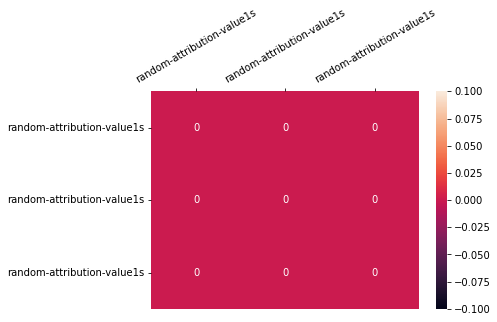

In [96]:
import seaborn as sns

ax = sns.heatmap(values, annot=True, xticklabels=labels_y, yticklabels=labels_y)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.xaxis.tick_top()
